In [ ]:
####################################################
#           DIAMOND-SQUARE ALGORITHM
####################################################

A-----B
|     |
|  M  |
|     |
C-----D

# A, B, C, and D are the corner points of a square, and M is the midpoint of the square. 
# The algorithm calculates the height of M by averaging the heights of A, B, C, and D, and then adding a random offset.

# The edge midpoints would be calculated for each edge, like this:

A-----E-----B
|           |
|  M        |
|           |
C-----F-----D

# Here, E and F are the midpoints of the edges AB and CD, respectively.
# The algorithm would calculate their heights by averaging the heights of the adjacent corner points (A and B for E, and C and D for F) and adding a random offset.

# The "diamond" pattern refers to the way the center point M is calculated, using the four corner points. 
# The recursive process then repeats this pattern for each new square formed by the midpoints and corner points.

In [1]:
#### Mountain Fractal Generation
# from https://github.com/dafarry/python-fractal-landscape

### Diamond Square Algorithm for terrain generation
# from https://janert.me/blog/2022/the-diamond-square-algorithm-for-terrain-generation/

# uses mayavi: https://pypi.org/project/mayavi/

# for jupyter support:
# $ jupyter nbextension install --py mayavi --user
# $ jupyter nbextension enable --py mayavi --user

import numpy, random
from mayavi import mlab

levels = 11

size = 2 ** (levels - 1) # 1024 - 2^10

height  = numpy.zeros((size + 1, size + 1)) # 2^n + 1 dimensions per the diamond squares algo - 1025x1025 matrix of 0s
# [[0,0,0,0...],[0,0,0,...],...]

# levels = 11 (i=0-10), size = 1024
for lvl in range(levels):
  # note that multiplication ** takes precedence over division // -> size // (2**lvl)
  step = size // (2 ** lvl) # 1024 // 2^0, then 1024 // 2^1, ... step is cut in half each time from 1024: == 1024,512,256,128,64,32,16,8,4,2,1
 
  # loop for each level = 0-10
  # size = 1024
  # step = 1024,512,256,128,64,32,16,8,4,2,1
  # (size+1 = 1025 inclusive of 1024) 
    # the iters increase this way after level and step is updated in the outer loop and this inner loop completes
  for y in range(0, size + 1, step): 
    print(f'startloop {y=}, {step=}, {lvl=}')
    # step is 1024,512,256,128,64,32,16,8,4,2,1 in outer loop as level increases from 0 to 10
    # step is updated as level changes 
    # number of iters for y increases by power of 2 each time here, total iters: 2,3,5,9,17,... we add on iterations +1+2+4+8+16...
    jumpover = 1 - (y // step) % 2 if lvl > 0 else 0  # 0 or 1, 0 for level 0 (first two iters where y = 0 and y = 1024)
    # 1 - means that if y / step is even, the output is 1, if odd then the output is 0
    # we want to jumpover 1 every other iteration - start at 1 (jumpover) at the beginning of each level change loop
    print(jumpover)
    
    for x in range(step * jumpover, size + 1, step * (1 + jumpover)):
      pointer = 1 - (x // step) % 2 + 2 * jumpover if lvl > 0 else 3
      yref, xref = step * (1 - pointer // 2), step * (1 - pointer % 2)

      corner1 = height[y - yref, x - xref]
      corner2 = height[y + yref, x + xref]
      average = (corner1 + corner2) / 2.0
      
      variation = step * (random.random() - 0.5)
      height[y,x] = average + variation if lvl > 0 else 0
    
    print(f'endloop {y=}, {step=}, {lvl=}\n')

# xg, yg = numpy.mgrid[-1:1:1j*size,-1:1:1j*size]
# surf = mlab.surf(xg, yg, height, colormap='gist_earth', warp_scale='auto')
# mlab.show()

startloop y=0, step=1024, lvl=0
0
endloop y=0, step=1024, lvl=0

startloop y=1024, step=1024, lvl=0
0
endloop y=1024, step=1024, lvl=0

startloop y=0, step=512, lvl=1
1
endloop y=0, step=512, lvl=1

startloop y=512, step=512, lvl=1
0
endloop y=512, step=512, lvl=1

startloop y=1024, step=512, lvl=1
1
endloop y=1024, step=512, lvl=1

startloop y=0, step=256, lvl=2
1
endloop y=0, step=256, lvl=2

startloop y=256, step=256, lvl=2
0
endloop y=256, step=256, lvl=2

startloop y=512, step=256, lvl=2
1
endloop y=512, step=256, lvl=2

startloop y=768, step=256, lvl=2
0
endloop y=768, step=256, lvl=2

startloop y=1024, step=256, lvl=2
1
endloop y=1024, step=256, lvl=2

startloop y=0, step=128, lvl=3
1
endloop y=0, step=128, lvl=3

startloop y=128, step=128, lvl=3
0
endloop y=128, step=128, lvl=3

startloop y=256, step=128, lvl=3
1
endloop y=256, step=128, lvl=3

startloop y=384, step=128, lvl=3
0
endloop y=384, step=128, lvl=3

startloop y=512, step=128, lvl=3
1
endloop y=512, step=128, lvl=3

s

In [2]:
### Full example: diamond-square algorithm

# Starting with a grid (e.g., height) initialized to zeros.
# Iteratively subdividing the grid into smaller squares (controlled by levels and step).
# At each step, calculating new height values at specific points by averaging neighboring corners and adding random variation.
# Using a pattern of offsets (jumpover, pointer) to determine which points to update in each iteration



import vtk
import mayavi
print("VTK Version:", vtk.vtkVersion.GetVTKVersion()) # mayavu v4 needs 9.2 to prevent warning
print("Mayavi Version:", mayavi.__version__)

import numpy, random
from mayavi import mlab

levels = 2
size = 2 ** (levels - 1) # increases exponentially as number of levels rise 2^l-1
height  = numpy.zeros((size + 1, size + 1))

for lvl in range(levels):
  step = size // 2 ** lvl
  for y in range(0, size + 1, step):
    jumpover = 1 - (y // step) % 2 if lvl > 0 else 0 # jumpover determines where next inner loop starts (i.e. skip over first n elements)
    for x in range(step * jumpover, size + 1, step * (1 + jumpover)):
      # adds 2 to the same formula above
      pointer = 1 - (x // step) % 2 + 2 * jumpover if lvl > 0 else 3
      yref, xref = step * (1 - pointer // 2), step * (1 - pointer % 2)
      corner1 = height[y - yref, x - xref]
      corner2 = height[y + yref, x + xref]
      average = (corner1 + corner2) / 2.0
      variation = step * (random.random() - 0.5)
      height[y,x] = average + variation if lvl > 0 else 0

xg, yg = numpy.mgrid[-1:1:1j*size,-1:1:1j*size]
surf = mlab.surf(xg, yg, height, colormap='gist_earth', warp_scale='auto')
mlab.show()

# This will open a image in a new window to see the result. close the image to kill process

VTK Version: 9.2.6
Mayavi Version: 4.8.2.dev0


In [3]:
# Full example with named constants:
# Notes on Named Constants for Fractal Mountain Landscape Generation (diamond-square algorithm):
#
# SUBDIVISION_LEVELS = 2
#   - Purpose: Defines how many times the grid is subdivided. Higher values increase fractal detail.
#   - Intent: Controls the resolution and complexity of the landscape.
#
# GRID_BASE_SIZE = 2 ** (SUBDIVISION_LEVELS - 1)
#   - Purpose: Sets the base size of the grid (e.g., 2 for 2 levels).
#   - Intent: Ensures the grid scales exponentially with levels, a core property of the algorithm.
#
# BOUNDARY_EXTENSION = 1
#   - Purpose: Adds an extra row/column to the grid (size + 1) to include boundary points.
#   - Intent: Allows the grid to have defined corners for the algorithm’s first pass.
#
# STEP_FACTOR = 2 ** level
#   - Purpose: Calculates the divisor for step size (e.g., 2^0, 2^1).
#   - Intent: Reduces the step size each level, enabling finer subdivisions.
#
# SKIP_INITIAL_X = 1 - (y // STEP_SIZE) % 2 if level > 0 else 0
#   - Purpose: Determines whether to skip the first x-element in the inner loop (0 or 1).
#   - Intent: Creates the staggered "diamond" pattern by alternating starting points.
#
# X_LOOP_INCREMENT_FACTOR = 1 + SKIP_INITIAL_X
#   - Purpose: Adjusts the x-loop increment (1 or 2) based on skipping.
#   - Intent: Ensures proper spacing in the diamond-square pattern.
#
# INITIAL_POINTER_VALUE = 3
#   - Purpose: Sets the pointer to 3 at level 0, forcing corner offsets to zero out.
#   - Intent: Initializes corners to 0 in the first pass, a starting condition.
#
# OFFSET_ADJUSTMENT = 2 * SKIP_INITIAL_X
#   - Purpose: Amplifies the skip effect in the pointer calculation (0 or 2).
#   - Intent: Aligns the pointer with the diamond-square grid traversal.
#
# Y_OFFSET_FACTOR = 1 - pointer // 2
#   - Purpose: Breaks `pointer` into y offset direction (0 or 1).
#   - Intent: Selects which diagonal corners to average (e.g., top-left, bottom-right).
#
# X_OFFSET_FACTOR = 1 - pointer % 2
#   - Purpose: Breaks `pointer` into x offset direction (0 or 1).
#   - Intent: Selects which diagonal corners to average (e.g., top-left, bottom-right).
#
# CORNER_AVERAGE_FACTOR = 2.0
#   - Purpose: Divides the sum of two corners to compute their average.
#   - Intent: Balances the height contribution from neighboring points.
#
# RANDOM_VARIATION_BASE = 0.5
#   - Purpose: Centers the random variation around 0 (range: -0.5 to 0.5).
#   - Intent: Adds controlled randomness to simulate natural terrain roughness.
#
# GRID_MIN = -1
#   - Purpose: Defines the lower bound for the visualization grid.
#   - Intent: Maps the height data onto a standard coordinate system for rendering.
#
# GRID_MAX = 1
#   - Purpose: Defines the upper bound for the visualization grid.
#   - Intent: Maps the height data onto a standard coordinate system for rendering.

import numpy, random
from mayavi import mlab


for i in range(2):
    # Number of subdivision levels for the fractal; higher values increase detail
    SUBDIVISION_LEVELS = i + 1
    # Base size of the grid, calculated as 2^(levels-1); defines the grid's resolution
    GRID_BASE_SIZE = 2 ** (SUBDIVISION_LEVELS - 1)
    # Extra point added to grid dimensions to include boundaries (e.g., size + 1)
    BOUNDARY_EXTENSION = 1

    # Initial height grid filled with zeros; dimensions are (size + 1) x (size + 1)
    height = numpy.zeros((GRID_BASE_SIZE + BOUNDARY_EXTENSION, GRID_BASE_SIZE + BOUNDARY_EXTENSION))

    # Iterate over each subdivision level to refine the terrain
    for level in range(SUBDIVISION_LEVELS):
        # Step size shrinks each level to target smaller grid sections
        STEP_FACTOR = 2 ** level
        STEP_SIZE = GRID_BASE_SIZE // STEP_FACTOR

        # Traverse rows with step size to set heights at specific points
        for y in range(0, GRID_BASE_SIZE + BOUNDARY_EXTENSION, STEP_SIZE):
            # Alternates starting x-position to form the diamond-square pattern; 0 at first level for corners
            SKIP_INITIAL_X = 1 - (y // STEP_SIZE) % 2 if level > 0 else 0

            # Adjust x-loop increment to match the staggered grid traversal
            X_LOOP_INCREMENT_FACTOR = 1 + SKIP_INITIAL_X
            for x in range(STEP_SIZE * SKIP_INITIAL_X, GRID_BASE_SIZE + BOUNDARY_EXTENSION, STEP_SIZE * X_LOOP_INCREMENT_FACTOR):
                # Sets pointer to 3 at level 0 to zero offsets, otherwise adjusts for diagonal corner selection
                INITIAL_POINTER_VALUE = 3  # Forces initial corners to stay flat
                OFFSET_ADJUSTMENT = 2 * SKIP_INITIAL_X  # Aligns pointer with row alternation
                pointer = 1 - (x // STEP_SIZE) % 2 + OFFSET_ADJUSTMENT if level > 0 else INITIAL_POINTER_VALUE

                # Determines vertical offset direction (up or down) to pick a corner for averaging
                Y_OFFSET_FACTOR = 1 - pointer // 2
                # Determines horizontal offset direction (left or right) to pair with the y-offset
                X_OFFSET_FACTOR = 1 - pointer % 2
                y_ref_offset = STEP_SIZE * Y_OFFSET_FACTOR
                x_ref_offset = STEP_SIZE * X_OFFSET_FACTOR

                # Select two diagonal corners to blend their heights
                corner1 = height[y - y_ref_offset, x - x_ref_offset]
                corner2 = height[y + y_ref_offset, x + x_ref_offset]

                # Average corners to smooth the new point’s height
                CORNER_AVERAGE_FACTOR = 2.0
                height_average = (corner1 + corner2) / CORNER_AVERAGE_FACTOR

                # Add random noise scaled by step size to simulate natural roughness
                RANDOM_VARIATION_BASE = 0.5
                height_variation = STEP_SIZE * (random.random() - RANDOM_VARIATION_BASE)
                # height_variation = STEP_SIZE

                # Keep corners flat at level 0, then apply variation for fractal detail
                height[y, x] = height_average + height_variation if level > 0 else 0

    # Create normalized grid for visualization, mapping indices to -1 to 1 range
    GRID_MIN = -1
    GRID_MAX = 1
    xg, yg = numpy.mgrid[GRID_MIN:GRID_MAX:1j*GRID_BASE_SIZE, GRID_MIN:GRID_MAX:1j*GRID_BASE_SIZE]
    
    print(f"\nSubdivision levels = {i}")
    print("Height Matrix:")
    print(str(height))  # the Height Matrix includes the heights at the midpoints, in addition to the heights at the corners.
    print("\nX Grid:")
    print(str(xg))
    print("\nY Grid:")
    print(str(yg))

    # Example connection between heights and x/y grid: the heights in the Height Matrix correspond to these points in the following order:

    # heights[0][0] is the top-left corner of the square
    # heights[0][1] is the top-center point of the square
    # heights[0][2] is the top-right corner of the square
    # heights[1][0] is the middle-left point of the square
    # heights[1][1] is the center point of the square
    # heights[1][2] is the middle-right point of the square
    # heights[2][0] is the bottom-left corner of the square
    # heights[2][1] is the bottom-center point of the square
    # heights[2][2] is the bottom-right corner of the square

    # Render the terrain (close img to stop process)
    surf = mlab.surf(xg, yg, height, colormap='gist_earth', warp_scale='auto')
    mlab.show()


Subdivision levels = 0
Height Matrix:
[[0. 0.]
 [0. 0.]]

X Grid:
[[-1.]]

Y Grid:
[[-1.]]

Subdivision levels = 1
Height Matrix:
[[ 0.         -0.41337244  0.        ]
 [-0.30229213 -0.30477525 -0.21298192]
 [ 0.         -0.23687197  0.        ]]

X Grid:
[[-1. -1.]
 [ 1.  1.]]

Y Grid:
[[-1.  1.]
 [-1.  1.]]


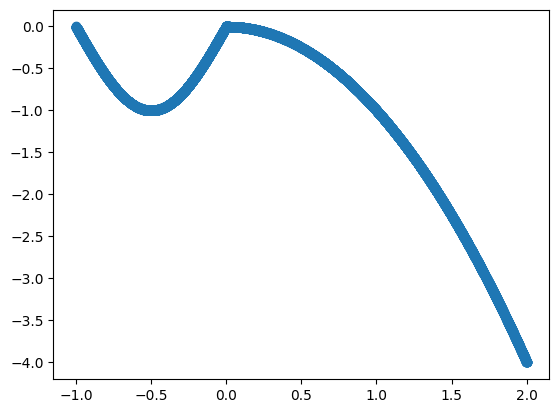

In [4]:
### PieceWise Function that has rises and falls ####

import numpy as np
import matplotlib.pyplot as plt

# make a piecewise function that accepts input and returns the computed y value (so we can use it in limits)
def fx(m):
    # guard against input being a tuple or list, convert to numpy array to prevent errors with the filters in the rules below
    m = np.array(m)
    # initialize y to be the same size as the input m
    y = np.zeros(m.shape)

    # Because numpy numbers can be very close to but not exactly 0 due to rounding errors, we need a tolerance
    tol = 10e-5 # very small number very close to 0 to cover cases where the generated number is not quite exactly 0
    # pieces to the piecewise function:
    y[m<-tol] = np.sin(m[m<0]*np.pi) # for negative input rule x < 0, we want to make sure tolerance specified is negative to satisfy rule
    y[m>tol] = -m[m>tol]**2 # second condition, x > 0
    y[np.abs(m)<tol] = 1.5 # third piece condition: x = 0, take absolute val of input and if it is less than tolerance, it can be considered 0
    return y

xx = np.linspace(-1,2,10001)

plt.plot(xx,fx(xx),'o')
plt.show()


In [5]:
a = 1024
b = 0

print(f'a//2 = {a//2}')
print(f'2**b = {2 ** b}')
print(f'ex1: {(a//2)**b}')
print(f'ex2: {a//(2**b)}')
step = a // 2 ** b
step

a//2 = 512
2**b = 1
ex1: 1
ex2: 1024


1024

In [6]:
size = 1024
step = 128

for y in range(0, size + 1, step):
    print(y)

for x in range(0,1):
    print('x')

0
128
256
384
512
640
768
896
1024
x


In [ ]:
#### Parabolic function shape #####

import sympy as sym

# a = sym.symbols('a')
# b = sym.symbols('b')
# x = sym.symbols('x')
# y = sym.symbols('y')

# a,b,x,y = 1,2,3,4

# fx = (x**2 / a**2) - (y**2 / b**2)
# display(fx)

# sym.plot(fx)


# a, b, x, y = sym.symbols('a b x y')
# fx = (x**2 / a**2) - (y**2 / b**2)
# sym.plot(fx)

# import sympy as sym
# from sympy.plotting import plot

# # Define symbols
# a, b, x, y = sym.symbols('a b x y')

# # Define the expression
# fx = (x**2 / a**2) - (y**2 / b**2)

# # Set a = 1 and vary b from 0.5 to 1
# a_value = 1

# # Substitute a = 1 and y = 0 to make it a single-variable function
# fx_single_var = fx.subs({a: a_value, y: 0})

# # Plot for different values of b in the range [0.5, 1]
# for b_value in [0.5, 0.75, 1]:
#     plot(fx_single_var.subs(b, b_value), (x, -10, 10), title=f"Plot with a={a_value}, b={b_value}")

from sympy import symbols
from sympy.plotting import plot3d

x, y = symbols('x y')
a_val = 1
b_val = 0.75
z = (x**2 / a_val**2) - (y**2 / b_val**2)
plot3d(z, (x, -5, 5), (y, -5, 5), title='Hyperbolic Paraboloid (Pringle Shape)')